In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
import scanpy as sc
import warnings
warnings.filterwarnings("ignore")

In [3]:
x = pd.read_csv('data/brain_counts.csv', index_col=0)

In [4]:
y = pd.read_csv('data/brain_metadata.csv', index_col=0)

In [5]:
y.head(2)

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728


In [6]:
adata = sc.AnnData(X = x, obs = y)


In [7]:
!pip install feyn

In [8]:
import feyn
from feyn import QLattice as ql 


df = pd.DataFrame(adata.X, columns=adata.var_names, index=adata.obs_names)
# Convert the target variable to binary
df['target'] = adata.obs['mouse.sex'].replace({'F': 0, 'M': 1}).values

ql = feyn.QLattice()



This version of feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at `https://abzu.ai/eula`.


In [9]:
# Train a classification model
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)
models = ql.auto_run(data=train, output_name='target', kind='classification')
best = models[0]
print('Classification score:', best)


Classification score: <feyn._model.Model object at 0x7f147ec6ee00>


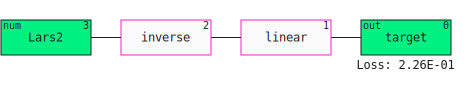

In [10]:
best

plot_regression

As we have a regressor, we would like to compare the true values of the target variable with the predicted values. The code below plots tuples: on the x-axis are the true values of the target variable and on the y-axis are the predicted values from the regressor. If the prediction is perfect then all the points should lie on the y=x dashed line. We can use this to see whether we overestimate or underestimate certain regions.

The line of best fit is an aid to see just how close the points are to the line of equality.

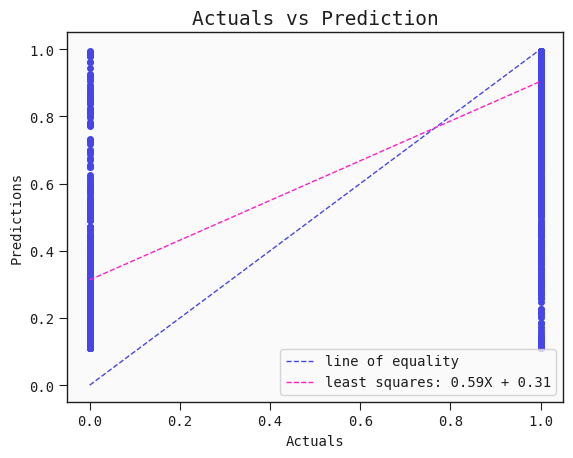

In [11]:
best.plot_regression(data=train)

Residuals plot

One of the basic diagnosics we can do with a Model is to plot the residuals (y_true - y_pred). This can help analyse whether errors are normally distributed or not. If they have an unusual distribution then it points towards biases in the Model. If they appear to be randomly scattered then this is a positive sign that the Model is unbiased.

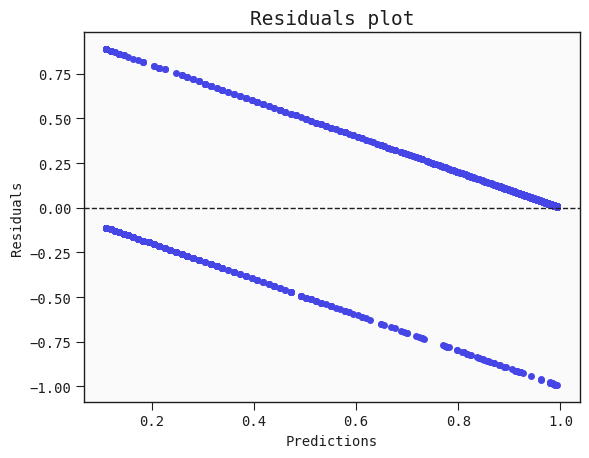

In [12]:
best.plot_residuals(data=train)

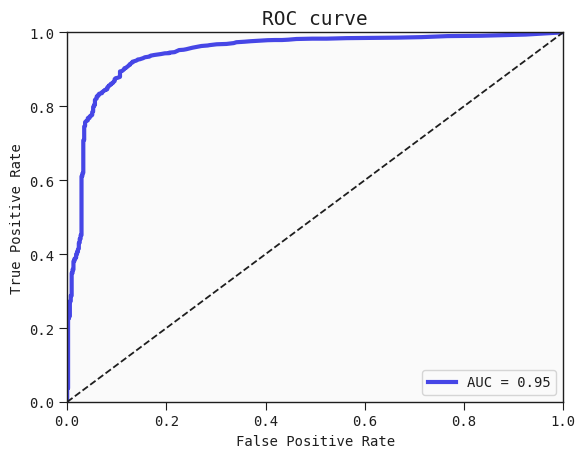

In [13]:
best.plot_roc_curve(train)

Confusion Matrix

This provides all the True Positives, True Negatives, False Positives and False Negatives at the pass threshold. The default threshold is 0.5.

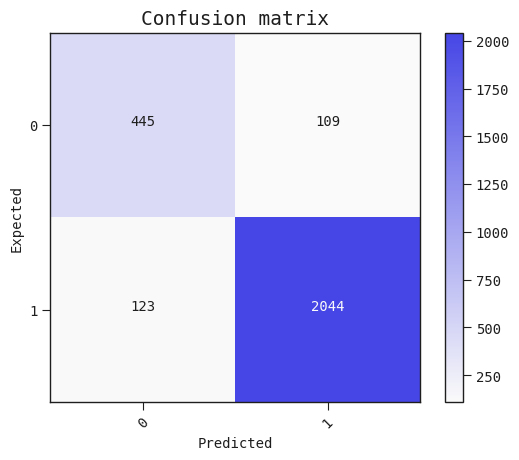

In [14]:
best.plot_confusion_matrix(train, threshold=0.5)

regression score: <feyn._model.Model object at 0x7f1491961660>


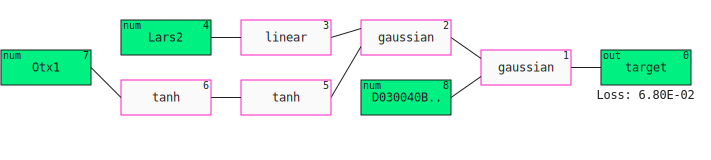

In [15]:
# Train a regression model
ql.reset()
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)
models = ql.auto_run(data=train, output_name='target', kind='regression')
fine = models[0]
print('regression score:', fine)
fine


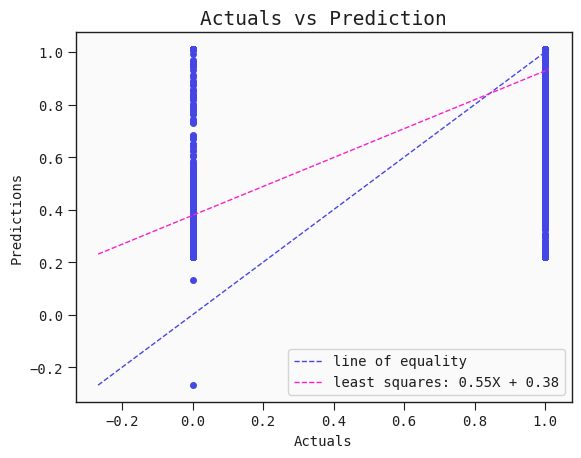

In [16]:
fine.plot_regression(data=train)


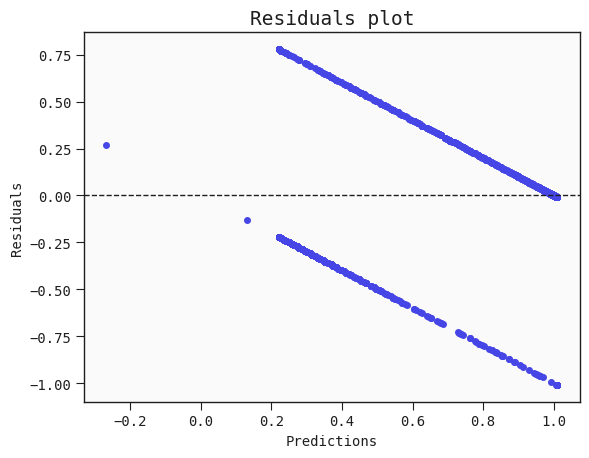

In [17]:
fine.plot_residuals(data=train)

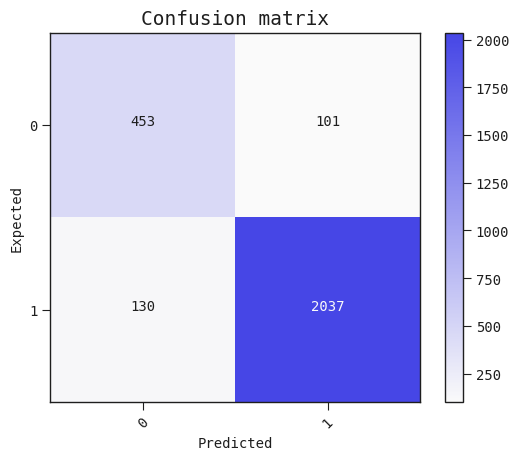

In [19]:
fine.plot_confusion_matrix(train, threshold=0.5)